# Table of Contents
 <p>

In [2]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import curve_fit as fit
from matplotlib.pyplot import *
mpl.rcParams.update(mpl.rcParamsDefault)
import math as m
import sys
### set matplotlib plot defaults :D
%matplotlib inline
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
style.use(['dark_background'])
# the default cycling of colors in this mode isn't very good.
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#FFFFFF','r','c','g','y','m','b'])
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
# jet is awful.
mpl.rcParams['image.cmap'] = 'magma'
# to see all available options, decomment this line.
#print(mpl.rcParams)

In [3]:
from datetime import datetime

datetime_object = datetime.strptime('8:42:55 AM, 2/22/2017', '%I:%M:%S %p, %m/%d/%Y')

In [4]:
    %%javascript
    // the above line makes this entire cell run javascript commands.
    // this gets rid of scroll bars on the output by default. It's in javascript because javascript is used 
    // by Jupyter to actually render the notebook display.
    IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
def readTemperatureData(name):
    data = pd.read_csv(name, header=9, delimiter=r"[\t]+", engine='python')
    times = []
    for time in data["Date Time"]:
        times.append(datetime.strptime(time, '%I:%M:%S %p, %m/%d/%Y'))
    return data, times

In [6]:
data1, times1 = readTemperatureData("tempData.txt")
data2, times2 = readTemperatureData("tempData2.txt")
# 3 isn't needed, it only overlaps with 2 and 4.
#data3, times3 = readTemperatureData("tempData3.txt")
data4, times4 = readTemperatureData("tempData4.txt")

In [66]:
"""
#tempInt_1 = []
#tempInt_2 = []
#tempInt_3 = []
#tempInt_4 = []
temp1_1 = []
temp1_2 = []
temp1_3 = []
temp1_4 = []
temp2_1 = []
temp2_2 = []
temp2_3 = []
temp2_4 = []
temp3_1 = []
temp3_2 = []
temp3_3 = []
temp3_4 = []
"""
tempInt = [[] for i in range(6)]
temp1 = [[] for i in range(6)]
temp2 = [[] for i in range(6)]
temp3 = [[] for i in range(6)]
segmentCount = [0 for i in range(6)]
finalTimes = []
counter = 0;
# Splice the data into the different chunks of interest.
for time in times1:
    if (time < datetime(2017, 2, 27, 11)):
#        print(tempInt[0])
        tempInt[0].append(data1["Temp Int (C)"][counter])
        temp1[0].append(data1["Temp 1 (C)"][counter])
        temp2[0].append(data1["Temp 2 (C)"][counter])
        temp3[0].append(data1["Temp 3 (C)"][counter])
        finalTimes.append(times1[counter])
        segmentCount[0] += 1
    elif (time > datetime(2017, 2, 27, 16) and time < datetime(2017, 3, 3, 18)):
        tempInt[1].append(data1["Temp Int (C)"][counter])
        temp1[1].append(data1["Temp 1 (C)"][counter])
        temp2[1].append(data1["Temp 2 (C)"][counter])
        temp3[1].append(data1["Temp 3 (C)"][counter]) 
        finalTimes.append(times1[counter])
        segmentCount[1] += 1
    elif (time > datetime(2017, 3, 4, 1)):
        tempInt[2].append(data1["Temp Int (C)"][counter])
        temp1[2].append(data1["Temp 1 (C)"][counter])
        temp2[2].append(data1["Temp 2 (C)"][counter])
        temp3[2].append(data1["Temp 3 (C)"][counter])
        finalTimes.append(times1[counter])
        segmentCount[2] += 1
    counter += 1
counter = 0
for time in times2:
    if (time > datetime(2017, 3, 10)):
        tempInt[3].append(data2["Temp Int (C)"][counter])
        temp1[3].append(data2["Temp 1 (C)"][counter])
        temp2[3].append(data2["Temp 2 (C)"][counter])
        temp3[3].append(data2["Temp 3 (C)"][counter])
        finalTimes.append(times2[counter])
        segmentCount[3] += 1
    counter += 1
counter = 0
for time in times4:
    if (time > datetime(2017, 3, 10) and time < datetime(2017, 3, 23, 12)):
        tempInt[4].append(data4["Temp Int (C)"][counter])
        temp1[4].append(data4["Temp 1 (C)"][counter])
        temp2[4].append(data4["Temp 2 (C)"][counter])
        temp3[4].append(data4["Temp 3 (C)"][counter])
        finalTimes.append(times4[counter])
        segmentCount[4] += 1
    if (time > datetime(2017, 3, 27)):
        tempInt[5].append(data4["Temp Int (C)"][counter])
        temp1[5].append(data4["Temp 1 (C)"][counter])
        temp2[5].append(data4["Temp 2 (C)"][counter])
        temp3[5].append(data4["Temp 3 (C)"][counter])
        finalTimes.append(times4[counter])
        segmentCount[5] += 1
    counter += 1
    
expTemp = temp1[0] + temp1[1] + temp1[2] + temp1[3] + temp1[4] + temp1[5]
ramanTemp = temp3[0] + temp3[1]
ventTemp = temp2[0] + temp2[1] + tempInt[2] + tempInt[3] + tempInt[4] + tempInt[5]
outsideTemp = temp2[2] + temp2[3] + temp2[4] + temp2[5]
thermostatTemp = temp3[2] + temp3[3] + temp3[4]


11245


In [72]:
print(segmentCount)
print(segmentCount[2] + segmentCount[3] + segmentCount[4])
print(len(thermostatTemp))
print(len(finalTimes[-len(thermostatTemp):]))

[7398, 5880, 7760, 14904, 11245, 5473]
33909
33909
33909


All results are formatted (2 * sigma,  peak to peak)

Before air change:
Experiment Box: 0.692979461523 1.8
Raman: 0.564693659895 1.1
Vent: 0.547903801364 4.4

After air change, before temperature change:
Experiment Box: 0.549659505217 1.5
Raman: 0.483166461928 1.2
Thermostat: 0.686409728836 1.8
Hallway: 1.17840250717 3.5
Vent before move: 0.689445891112 2.0
Vent after move: 0.664816449776 1.5

After temperature change:
Experiment Box: 0.407716514649 1.2
Thermostat: 0.205032670558 1.0
Hallway: 0.623459626231 1.7
Vent: 0.300466236547 0.9

After moving thermostat:
Experiment Box: 0.344323932857 1.0
Thermostat: (N/A, opps)
Hallway: 0.533027329824 1.5
Vent: 0.386879687294 1.0


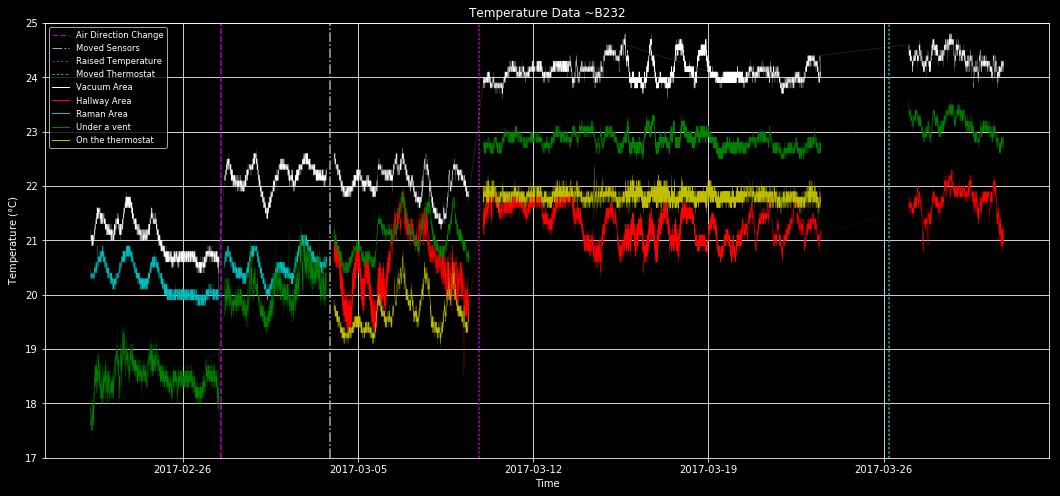

In [71]:
axvline(datetime(2017, 2, 27, 13),ls='--', color='m', label='Air Direction Change')
axvline(datetime(2017, 3, 3, 21),ls='-.', color = '#aaaaaa', label='Moved Sensors')
axvline(datetime(2017, 3, 9, 20), ls=':', color = 'm', label='Raised Temperature')
axvline(datetime(2017,3,26,5), ls=':', color='c', label='Moved Thermostat')
plot(finalTimes[:len(expTemp)], expTemp, lw=0.1, label='Vacuum Area')
plot(finalTimes[-len(outsideTemp):], outsideTemp, lw=0.1, label='Hallway Area');
plot(finalTimes[:len(ramanTemp)], ramanTemp, lw=0.1, label='Raman Area')
plot(finalTimes[:len(ventTemp)], ventTemp, lw=0.1, label='Under a vent')
plot(finalTimes[-len(thermostatTemp)-segmentCount[5]:-segmentCount[5]], thermostatTemp,  lw=0.1, label='On the thermostat')
# can't see the legend colors normally since I'm using very thin lines...
leg = legend(loc=2, fontsize = 'small')
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.0)
title('Temperature Data ~B232')
xlabel('Time')
ylabel('Temperature ($\degree$C)')
ylim(17, 25);

print("All results are formatted (2 * sigma,  peak to peak)")
print("\nBefore air change:")
print("Experiment Box:", 2*np.std(temp1[0]), np.ptp(temp1[0]))
print("Raman:", 2*np.std(temp3[0]), np.ptp(temp3[0]))
print("Vent:", 2*np.std(temp2[0]), np.ptp(temp2[0]))

print("\nAfter air change, before temperature change:")
print("Experiment Box:", 2*np.std(temp1[1] + temp1[2]), np.ptp(temp1[1] + temp1[2]))
print("Raman:", 2*np.std(temp3[1]), np.ptp(temp3[1]))
print("Thermostat:", 2*np.std(temp3[2]), np.ptp(temp3[2]))
print("Hallway:", 2*np.std(temp2[2]), np.ptp(temp2[2]))
print("Vent before move:", 2*np.std(temp2[1]), np.ptp(temp2[1]))
print("Vent after move:", 2*np.std(tempInt[2]), np.ptp(tempInt[2]))

print("\nAfter temperature change:")
print("Experiment Box:", 2*np.std(temp1[3] + temp1[4]), np.ptp(temp1[3] + temp1[4]))
print("Thermostat:", 2*np.std(temp3[3] + temp3[4]), np.ptp(temp3[3] + temp3[4]))
print("Hallway:", 2*np.std(temp2[3] + temp2[4]), np.ptp(temp2[3] + temp2[4]))
print("Vent:", 2*np.std(tempInt[3] + tempInt[4]), np.ptp(tempInt[3] + tempInt[4]))

print("\nAfter moving thermostat:")
print("Experiment Box:", 2*np.std(temp1[5]), np.ptp(temp1[5]))
print("Thermostat: (N/A, opps)")
print("Hallway:", 2*np.std(temp2[5]), np.ptp(temp2[5]))
print("Vent:", 2*np.std(tempInt[5]), np.ptp(tempInt[5]))